<a href="https://colab.research.google.com/github/Kingdms/pension_record_NB/blob/main/Yet_another_copy_of_Pension_records_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import base64
import seaborn as sns
import time

In [11]:
df_train = pd.read_csv("/content/drive/MyDrive/DataSet/MNIST_train.csv")



In [12]:
df_train

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,59995,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,59996,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,59997,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,59998,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_train.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB


In [15]:
df_train.shape

(60000, 787)

In [16]:
df_train = df_train.iloc[:,2:]

y_train = df_train.iloc[:, 0].to_numpy()
X_train = df_train.iloc[:, 1].to_numpy()

In [17]:
df_train.shape

(60000, 785)

In [18]:
df_train.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_test = pd.read_csv("/content/drive/MyDrive/DataSet/MNIST_test.csv")


In [20]:
df_test.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_test= df_test.iloc[:,2:]

y_test = df_test.iloc[:, 0].to_numpy()
X_test = df_test.iloc[:, 1].to_numpy()

In [22]:
df_test.head()

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Normalizing the feature Data

In [23]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

/tmp/ipython-input-23-3035961965.py:1: RuntimeWarning: invalid value encountered in divide
  X_train = X_train / X_train.max()
/tmp/ipython-input-23-3035961965.py:2: RuntimeWarning: invalid value encountered in divide
  X_test = X_test / X_test.max()


#Model using Naive Bayes Classifier

In [26]:
class NaiveBayesClassifier:
  def fit(self, X, y):
    self.classes = np.unique(y)
    self.mean = {}
    self.var = {}
    self.priors = {}

    for c in self.classes:
      X_c =X[y == c]
      self.mean[c] = np.mean(X_c, axis = 0)
      self.var[c] = np.var(X_c, axis = 0) + 1e-6
      self.priors[c] = X_c.shape[0] / X.shape[0]

  def predict(self, X):
    return np.array([self._predict(x) for x in X])

  def _predict(self, x):
    posteriors = []

    for c in self.classes:
      prior = np.log(self.priors[c])
      class_conditional = -0.5 * np.sum(np.log(2. * np.pi * self.var[c]))
      class_conditional -= 0.5 * np.sum(((x - self.mean[c]) ** 2) / self.var[c])
      posterior = prior + class_conditional
      posteriors.append(posterior)

    return self.classes[np.argmax(posteriors)]


#Train and Test the Model

In [28]:
nb = NaiveBayesClassifier()

start_time = time.time()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
end_time = time.time()

accuracy = np.mean(predictions == y_test)


In [40]:
def accuracy(y_true, y_pred):
   return np.mean(y_true == y_pred)

nb = NaiveBayesClassifier()
nb.fit(X_train, y_train)
test_preds = nb.predict(X_test)
train_preds = nb.predict(X_train)

test_acc = accuracy(y_test, test_preds)
train_acc = accuracy(y_train, train_preds)

In [39]:
test_acc, train_acc

(np.float64(0.098), np.float64(0.09871666666666666))

# PLot Accuracy for different K Values

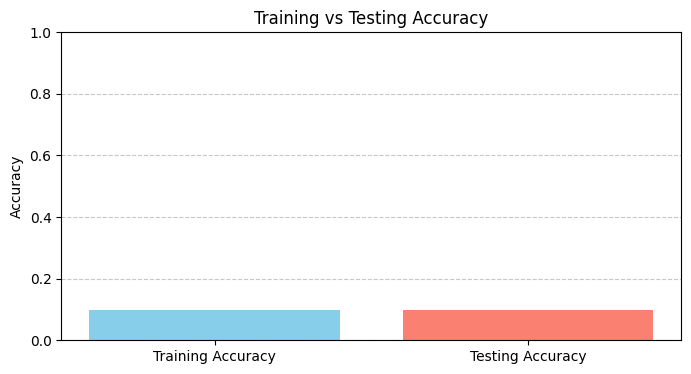

In [43]:
accuracies = [train_acc, test_acc]
labels = ['Training Accuracy', 'Testing Accuracy']

plt.figure(figsize=(8, 4))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

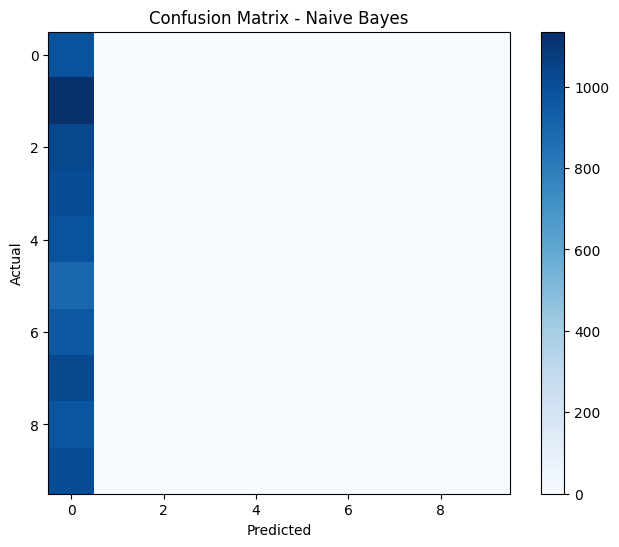

In [44]:
def build_confusion_matrix(y_true, y_pred):
   labels = sorted(np.unique(y_true))
   matrix = np.zeros((len(labels), len(labels)), dtype=int)
   label_map = {label: idx for idx, label in enumerate(labels)}
   for true, pred in zip(y_true, y_pred):
       matrix[label_map[true], label_map[pred]] += 1
   return matrix, labels

conf_matrix, labels = build_confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()